# TRANSFORMER ENCODER - PHASE 1

<img src="Transformer Encoder.png">

## TABLE OF CONTENTS
* **Other Information**<br>
&emsp;1) [**Websites for Information**](#Go-through-this-websites-for-better-Understanding:)

## MAIN CONTENT TABLE
1) &ensp;&ensp;[**IMPORTING LIBRARIES**](#1-IMPORTING-LIBRARIES)<BR>
2) &ensp;&ensp;[**GETTING TWITTER DATA**](#2-GETTING-TWITTER-DATA)<BR>
3) &ensp;&ensp;[**DATA PREPROCESSING OF TWITTER DATA**](#3-DATA-PREPROCESSING-OF-TWITTER-DATA)<BR>
4) &ensp;&ensp;[**CUSTOM DEFINED FUNCTIONS TO CLEAN TWITTER DATA**](#4-CUSTOM-DEFINED-FUNCTIONS-TO-CLEAN-TWITTER-DATA)<BR>
&emsp;&emsp;4.1) &ensp;&ensp;[**CLEANING OF TWITTER DATA**](#4.1-CLEANING-OF-TWITTER-DATA)<BR>
&emsp;&emsp;4.2) &ensp;&ensp;[**PERFORMING EDA AND MORE DATA CLEANING.....**](#4.2-PERFORMING-EDA-AND-MORE-DATA-CLEANING.....)<BR>
5) &ensp;&ensp;[**SPLITTING THE DATA INTO X AND Y**](#5-SPLITTING-THE-DATA-INTO-X-AND-Y)<BR>
6) &ensp;&ensp;[**TOKENIZER FUNCTION FOR TWITTER DATA**](#6-TOKENIZER-FUNCTION-FOR-TWITTER-DATA)<BR>
7) &ensp;&ensp;[**VOCAB AND EMBEDDING_DIM**](#7-VOCAB-AND-EMBEDDING_DIM)<BR>
8) &ensp;&ensp;[***(Optional)*** **FIRST TYPE OF EMBEDDING METHOD USING WORD2VEC MODEL**](#8-FIRST-TYPE-OF-EMBEDDING-METHOD-USING-WORD2VEC-MODEL)<BR>
9) &ensp;&ensp;[**TRANSFORMER ENCODING STEPS**](#9-TRANSFORMER-ENCODING-STEPS)<BR>
&emsp;&emsp;9.0) &ensp;&ensp;[**TRANSFORMER ENCODER - IMPLEMENTED IN THIS NOTEBOOK**](#9.0-TRANSFORMER-ENCODER---IMPLEMENTED-IN-THIS-NOTEBOOK)<BR>
&emsp;&emsp;9.1) &ensp;&ensp;[**FIRST STEP - EMBEDDING THE INPUTS**](#9.1-FIRST-STEP---EMBEDDING-THE-INPUTS)<br>
    &emsp;&emsp;9.2) &ensp;&ensp;[**SECOND STEP - POSITIONAL ENCODINGS**](#9.2-SECOND-STEP---POSITIONAL-ENCODINGS)<br>
    &emsp;&emsp;9.3) &ensp;&ensp;[**THIRD STEP - MULTI HEAD ATTENTION LAYER**](#9.3-THIRD-STEP---MULTI-HEAD-ATTENTION-LAYER)<br>
    &emsp;&emsp;9.4) &ensp;&ensp;[**FOURTH STEP - FEEDFORWARD LAYER**](#9.4-FOURTH-STEP---FEEDFORWARD-LAYER)<BR>
    &emsp;&emsp;9.5) &ensp;&ensp;[**FIFTH STEP - ENCODER LAYER**](#9.5-FIFTH-STEP---ENCODER-LAYER)<br>
    &emsp;&emsp;9.6) &ensp;&ensp;[**SIXTH STEP - ENCODER TRANSFORMER**](#9.6-SIXTH-STEP---ENCODER-TRANSFORMER)<br>
10) &ensp;&ensp;[**CREATING METHOD AND GETTING OUTPUT FROM TRANSFORMER ENCODER**](#10-CREATING-METHOD-AND-GETTING-OUTPUT-FROM-TRANSFORMER-ENCODER)

### Go through this websites for better Understanding: 
**1) [Transformers Encoder - Decoder](https://kikaben.com/transformers-encoder-decoder/)**<br>
**2) [History of Transformers](https://neptune.ai/blog/comprehensive-guide-to-transformers#:~:text=The%20Transformer%20architecture%20enables%20models,text%20from%20start%20to%20finish.)**<br>
**3) An Amazing Reserach Paper and this is where it Started: [Attention is all you need](https://arxiv.org/abs/1706.03762)**<br>
**4) [How to code The Transformer in Pytorch](https://towardsdatascience.com/how-to-code-the-transformer-in-pytorch-24db27c8f9ec#b0ed)**<br>
**5) [An Overview Of Encoder Transformers — Part 1](https://medium.com/geekculture/an-overview-of-encoder-transformers-part-1-78524ca5a784)**<br>
**6) [An Overview Of Encoder Transformers — Part 2](https://medium.com/geekculture/an-overview-of-encoder-transformers-part-2-3a533620f6af)**

## 1 IMPORTING LIBRARIES

In [1]:
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import re, string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

#Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
# from transformers import AdamW, get_linear_schedule_with_warmup

from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
# torch.cuda.manual_seed_all(seed_value)


import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<Figure size 640x480 with 0 Axes>

## 2 GETTING TWITTER DATA

In [2]:
df = pd.read_csv("/Users/bhanuprasanna/Desktop/PROJECTS AND WORK/PP1 MODEL/1ST STEP MHA/archive/twitter_training.csv")
df.head(2)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"


## 3 DATA PREPROCESSING OF TWITTER DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
df = df.rename(columns={'im getting on borderlands and i will murder you all ,' : 'text',
                        'Positive' : 'sentiment'})

In [5]:
df.head()

,2401,Borderlands,sentiment,text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"


In [6]:
df = df.drop(['2401', 'Borderlands'], axis=1)

In [7]:
df.head(2)

,sentiment,text
0,Positive,"I am coming to the borders and I will kill you all,"
1,Positive,"im getting on borderlands and i will kill you all,"


In [8]:
df.duplicated().sum()

4909

In [9]:
df = df[~df.duplicated()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69772 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  69772 non-null  object
 1   text       69768 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [11]:
df.sentiment.value_counts()

Negative      21238
Positive      19138
Neutral       17111
Irrelevant    12285
Name: sentiment, dtype: int64

## 4 CUSTOM DEFINED FUNCTIONS TO CLEAN TWITTER DATA

In [12]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TWEETS

#Clean emojis from text
def strip_emoji(text):
    return str(emoji.demojize(str(text))) #remove emoji

#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
#NOTE:Stemming seems to work better for this dataset
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def deep_clean(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

### 4.1 CLEANING OF TWITTER DATA

In [13]:
texts_new = []
for t in df.text:
    texts_new.append(deep_clean(t))

In [14]:
len(texts_new)

69772

In [15]:
df['text_clean'] = texts_new

In [16]:
df.head()

,sentiment,text,text_clean
0,Positive,"I am coming to the borders and I will kill you all,",come border kill
1,Positive,"im getting on borderlands and i will kill you all,",im get borderland kill
2,Positive,"im coming on borderlands and i will murder you all,",im come borderland murder
3,Positive,"im getting on borderlands 2 and i will murder you me all,",im get borderland 2 murder
4,Positive,"im getting into borderlands and i can murder you all,",im get borderland murder


In [17]:
df.shape

(69772, 3)

In [18]:
df["text_clean"].duplicated().sum()

7826

In [19]:
df.drop_duplicates("text_clean", inplace=True)

In [20]:
df.shape

(61946, 3)

In [21]:
df.sentiment.value_counts()

Negative      18962
Positive      16496
Neutral       15550
Irrelevant    10938
Name: sentiment, dtype: int64

In [22]:
sentiments = ['Negative', 'Positive', 'Neutral', 'Irrelevant']

In [23]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [24]:
df['text_len'] = text_len

### 4.2 PERFORMING EDA AND MORE DATA CLEANING.....

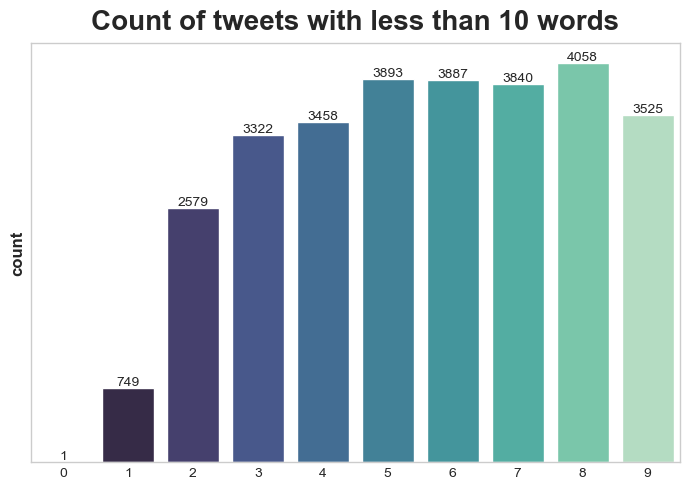

In [25]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [26]:
df = df[df['text_len'] > 3] # We will remove tweets that are too short (less than 4 words).

In [27]:
df.sort_values(by=['text_len'], ascending=False).head(1)

,sentiment,text,text_clean,text_len
8545,Positive,I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEE E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E,realli overwatch rn game sea sea sea sea sea sea sea sea sea sea sea sea sea sea sea sea sea sea sea see e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e e,163


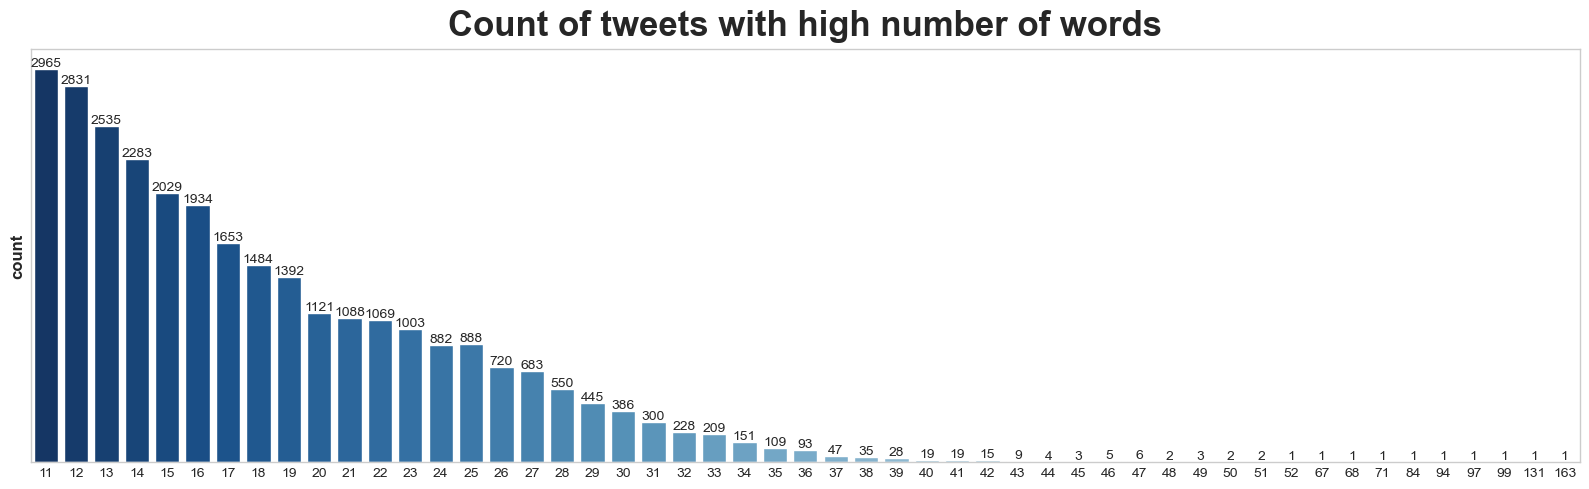

In [28]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=df[(df['text_len']<=1000) & (df['text_len']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [29]:
df = df[df['text_len'] < 60] # We also will remove tweets that are too long (with more than 100 words).

In [30]:
max_len = np.max(df['text_len'])
max_len 

52

In [31]:
df['sentiment'] = df['sentiment'].replace({'Negative':0,'Positive':1,'Neutral':2,'Irrelevant':3})

In [32]:
df.head(1)

,sentiment,text,text_clean,text_len
1,1,"im getting on borderlands and i will kill you all,",im get borderland kill,4


## 5 SPLITTING THE DATA INTO X AND Y

In [33]:
X = df['text_clean']
y = df['sentiment']

## 6 TOKENIZER FUNCTION FOR TWITTER DATA

In [34]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [35]:
vocabulary, tokenized_column = Tokenize(df["text_clean"], max_len)

In [36]:
df["text_clean"].iloc[1]

'im come borderland murder'

In [37]:
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

In [38]:
Word2vec_train_data = list(map(lambda x: x.split(), X))

## 7 VOCAB AND EMBEDDING_DIM

In [39]:
EMBEDDING_DIM = 200

In [40]:
print(f"Vocabulary size: {len(vocabulary) + 1}")

Vocabulary size: 26809


In [41]:
VOCAB_SIZE = len(vocabulary) + 1 #+1 for the padding

## 8 FIRST TYPE OF EMBEDDING METHOD USING WORD2VEC MODEL

**WE WON'T USE THE BELOW WORD2VEC MODEL AS WE ARE GOING TO USE A CLASS TO DEFINE THE EMBEDDING AND USE PYTORCH METHOD FOR EMBEDDING.**

In [42]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [43]:
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary:
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (26809, 200)


In [44]:
embedding_matrix[0][1]

0.0

## 9 TRANSFORMER ENCODING STEPS

### 9.0 TRANSFORMER ENCODER - IMPLEMENTED IN THIS NOTEBOOK

In 2017, Vaswani et al. published a paper titled “Attention Is All You Need” for the NeurIPS conference. They introduced the original transformer architecture for machine translation, performing better and faster than RNN encoder-decoder models, which were mainstream.

The transformer architecture is the basis for recent well-known models like BERT and GPT-3. Researchers have already applied the transformer architecture in computer vision and reinforcement learning. So, understanding the transformer architecture is crucial if you want to know where machine learning is making headway.

However, the transformer architecture may look complicated to those without much background.

![Image](https://i.stack.imgur.com/eAKQu.png)

![Image](https://camo.githubusercontent.com/4e0770801220d426e392319dff4359ec34356f9d004ed31b406c29cd0f2ff80e/68747470733a2f2f692e6962622e636f2f596852367757662f656e636f6465722e706e67)

The inputs to the Transformer Encoder will the Twitter Data which is preprocessed.<br>
**Language: English**<br>

In effect, there are four processes we need to understand to implement this model:

* Embedding the inputs
* The Positional Encodings
* The Multi-Head Attention layer
* The Feed-Forward layer

![Image](https://camo.githubusercontent.com/4e0770801220d426e392319dff4359ec34356f9d004ed31b406c29cd0f2ff80e/68747470733a2f2f692e6962622e636f2f596852367757662f656e636f6465722e706e67)

### 9.1 FIRST STEP - EMBEDDING THE INPUTS

In [45]:
# Embedding (Input Embedding Step in Transformer Encoder)
class Embedder(nn.Module):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_model)
    def forward(self, x):
        return self.embed(x)

#### 9.1.1 USING THE CLASS FOR EMBEDDING THE TOKENIZED COLUMNS

In [46]:
em_tensor = torch.from_numpy(tokenized_column[20])

In [47]:
sam_emb = Embedder(VOCAB_SIZE, EMBEDDING_DIM)

In [48]:
emb_out = []
for i in tokenized_column:
    em_tensor = torch.from_numpy(i)
    emb_out.append(sam_emb.forward(em_tensor))

### 9.2 SECOND STEP - POSITIONAL ENCODINGS

In [49]:
class PositionEmbeddings(nn.Module):
    def __init__(self, VOCAB_SIZE, EMBEDDING_DIM=200, HIDDEN_SIZE=200, MAX_POSITION_EMBEDDINGS=512):
        super().__init__()
        self.token_embeddings = nn.Embedding(VOCAB_SIZE, HIDDEN_SIZE)
        self.position_embeddings = nn.Embedding(MAX_POSITION_EMBEDDINGS, HIDDEN_SIZE)
        self.layer_norm = nn.LayerNorm(HIDDEN_SIZE, eps=1e-12)
        
    def forward(self, INPUT_IDS):
        seq_length = INPUT_IDS.size(1)
        position_ids = torch.arange(seq_length, dtype=torch.long).unsqueeze(0)
        token_embeddings = self.token_embeddings(INPUT_IDS)
        position_embeddings = self.position_embeddings(position_ids)
        embeddings = token_embeddings + position_embeddings
        embeddings = self.layer_norm(embeddings)
        return embeddings

### 9.3 THIRD STEP - MULTI HEAD ATTENTION LAYER

In [50]:
# Scaled Dot Product Attention
from math import sqrt
def scaled_dot_product_attention(query, key, value):
    dim_k = query.size(-1)
    attention_scores = torch.bmm(query, key.transpose(1,2)/sqrt(dim_k))
    weights = F.softmax(attention_scores, dim=-1)
    return torch.bmm(weights, value)

In [51]:
# Attention Head
class AttentionHead(nn.Module):
    def __init__(self, embedded_dim, head_dim):
        super().__init__()
        self.query = nn.Linear(embedded_dim, head_dim)
        self.key = nn.Linear(embedded_dim, head_dim)
        self.value = nn.Linear(embedded_dim, head_dim)
        
    def forward(self, hidden_state):
        attention_outputs = scaled_dot_product_attention(self.query(hidden_state),
                                                         self.key(hidden_state),
                                                         self.value(hidden_state))
        return attention_outputs

In [52]:
# Multihead Attention
class MultiHeadAttention(nn.Module):
    def __init__(self, EMBEDDING_DIM):
        super().__init__()
        embedded_dim = EMBEDDING_DIM
        num_heads = 10
        head_dim = embedded_dim // num_heads
        self.heads = nn.ModuleList([AttentionHead(embedded_dim, head_dim) for _ in range(num_heads)])
        self.output_linear = nn.Linear(embedded_dim, embedded_dim)
        
    def forward(self, hidden_state):
        output = torch.cat([h(hidden_state) for h in self.heads], dim=-1)
        output = self.output_linear(output)
        return output

### 9.4 FOURTH STEP - FEEDFORWARD LAYER

In [53]:
INTERMEDIATE_SIZE = 3072
HIDDEN_DROPOUT_PROB = 0.1
HIDDEN_SIZE = 200

In [54]:
class FeedForward(nn.Module):
    def __init__(self, INTERMEDIATE_SIZE=3072, HIDDEN_DROPOUT_PROB=0.1, HIDDEN_SIZE=200):
        super().__init__()
        self.linear_1 = nn.Linear(HIDDEN_SIZE, INTERMEDIATE_SIZE)
        self.linear_2 = nn.Linear(INTERMEDIATE_SIZE, HIDDEN_SIZE)
        self.gelu = nn.GELU()
        self.dropout = nn.Dropout(HIDDEN_DROPOUT_PROB)
        
    def forward(self, x):
        x = self.linear_1(x)
        x = self.gelu(x)
        x = self.linear_2(x)
        x = self.dropout(x)
        return x

### 9.5 FIFTH STEP - ENCODER LAYER

In [55]:
class EncoderLayer(nn.Module):
    def __init__(self, HIDDEN_SIZE=200):
        super().__init__()
        self.prelayer_norm_1 = nn.LayerNorm(HIDDEN_SIZE)
        self.prelayer_norm_2 = nn.LayerNorm(HIDDEN_SIZE)
        self.attention = MultiHeadAttention(200)
        self.feed_forward = FeedForward(3072, 0.1, 200)
        
    def forward(self, x):
        hidden_state = self.prelayer_norm_1(x)
        x = x + self.attention(hidden_state)
        x = x + self.feed_forward(self.prelayer_norm_2(x))
        return x


### 9.6 SIXTH STEP - ENCODER TRANSFORMER

In [56]:
class EncoderTransformer(nn.Module):
    def __init__(self, VOCAB_SIZE, NUM_HIDDEN_LAYERS=12):
        super().__init__()
        self.embeddings = PositionEmbeddings(VOCAB_SIZE)
        self.layers = nn.ModuleList([EncoderLayer() for _ in range (NUM_HIDDEN_LAYERS)])
        
    def forward(self, x):
        x = self.embeddings(x)
        for layer in self.layers:
            x = layer(x)
        return x

## 10 CREATING METHOD AND GETTING OUTPUT FROM TRANSFORMER ENCODER

In [57]:
ET_SAMP_01 = EncoderTransformer(VOCAB_SIZE)

In [58]:
value = ET_SAMP_01.forward(torch.from_numpy(tokenized_column[0][None, :]))

In [59]:
value.shape

torch.Size([1, 52, 200])

In [60]:
value

tensor([[[-2.5143,  1.6291, -0.5693,  ...,  1.6742, -0.4742,  3.0619],
         [-3.8500,  0.9295,  0.4438,  ...,  1.2660,  1.4417,  1.9652],
         [-3.6027, -0.7894, -0.1591,  ...,  0.3251, -0.4083,  3.6763],
         ...,
         [-1.0379,  0.1341,  1.6007,  ..., -0.2671,  0.1396,  2.7739],
         [-1.1251, -0.3282,  1.5985,  ..., -0.9402,  0.6344,  2.3652],
         [-0.4099, -2.0448,  1.5711,  ...,  0.2903, -3.1228,  2.1360]]],
       grad_fn=<AddBackward0>)